<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Supervised%20Learning%20with%20Scikit-Learn/Machine%20Learning%20for%20Time%20Series%20Data%20in%20Python/2%20Time%20Series%20as%20Inputs%20to%20a%20Model/2_Time_Series_as_Inputs_to_a_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series as Inputs to a Model

The easiest way to incorporate time series into your machine learning pipeline is to use them as features in a model. This chapter covers common features that are extracted from time series in order to do machine learning.

# Classifying a time series

1. Classification and feature engineering
We'll now discuss one of the most common categories of machine learning problems: classification. We'll also discuss the concept of feature engineering in the context of time series data.

2. Always visualize raw data before fitting models
Before we begin, let's take a moment to once again visualize the data we're dealing with. There is a lot of complexity in any machine learning step, and visualizing your raw data is important to make sure you know where to begin.

3. Visualize your timeseries data!
To plot raw audio, we need two things: the raw audio waveform, usually in a 1- or 2-dimensional array. We also need the timepoint of each sample. We can calculate the time by dividing the index of each sample by the sampling frequency of the timeseries. This gives us the time for each sample relative to the beginning of the audio.

4. What features to use?
As we saw in the introduction, using raw data as input to a classifier is usually too noisy to be useful. An easy first step is to calculate summary statistics of our data, which removes the "time" dimension and give us a more traditional classification dataset.

5. Summarizing timeseries with features
Here we see a description of this process. For each timeseries, we calculate several summary statistics. These then can be used as features for a model. We have expanded a single feature (raw audio amplitude) to several features (here, the min, max, and average of each sample).

6. Calculating multiple features
Here we show how to calculate multiple features for a several timeseries. By using the "axis equals -1" keyword, we collapse across the last dimension, which is time. The result is an array of numbers, one per timeseries.

7. Fitting a classifier with scikit-learn
In the last step, we collapsed a two-dimensional array into a one-dimensional array for each feature of interest. We can then combine these as inputs to a model. In the case of classification, we also need a label for each timeseries that allows us to build a classifier.

8. Preparing your features for scikit-learn
In order to prepare your data for scikit-learn, remember to ensure that it has the correct shape, which is samples by features. Here we can use the column_stack function, which lets us stack arrays by turning them into the columns of a two-dimensional array. In addition, the labels array is 1-dimensional, so we reshape it so that it is two dimensions. Finally, we fit our model to these arrays, X and y.

9. Scoring your scikit-learn model
Now that we've fit our model, we'll score the classifier. There are many ways that we can score a classifier with scikit-learn. First, we show how to generate predictions with a model that has been fit to data. If we have separate test data, we can use the "predict" method to generate a predicted list of classes for each sample. We can then calculate a score by dividing the total number of correct predictions by the total number of test samples. Alternatively, we can use the accuracy_score function that's built into scikit-learn by passing the test set labels and the predictions.

10. Let's practice!
Now it's your turn. We'll practice visualizing our raw audio data, then creating some summary features from it that we'll feed into a classifier.

# Many repetitions of sounds

In this exercise, you'll start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.

You'll use the heartbeat data described in the last chapter. Some recordings are normal heartbeat activity, while others are abnormal activity. Let's see if you can spot the difference.

Two DataFrames, normal and abnormal, each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called sfreq. A convenience plotting function show_plot_and_make_titles() is also available in your workspace.

Instructions

1. First, create the time array for these audio files (all audios are the same length).

2. Then, stack the values of the two DataFrames together (normal and abnormal, in that order) so that you have a single array of shape (n_audio_files, n_times_points).

3. Finally, use the code provided to loop through each list item / axis, and plot the audio over time in the corresponding axis object.

4. You'll plot normal heartbeats in the left column, and abnormal ones in the right column

In [ ]:
'''
In [1]:
show_plot_and_make_titles??
Signature: show_plot_and_make_titles()
Source:
def show_plot_and_make_titles():
   axs[0, 0].set(title="Normal Heartbeats")
   axs[0, 1].set(title="Abnormal Heartbeats")
   plt.tight_layout()
   plt.show()

File:      /tmp/tmp61639cft/<ipython-input-1-a8e9b123ebb0>
Type:      function
'''

fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(0, len(normal)) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

Conclusion

Correct! As you can see there is a lot of variability in the raw data, let's see if you can average out some of that noise to notice a difference.

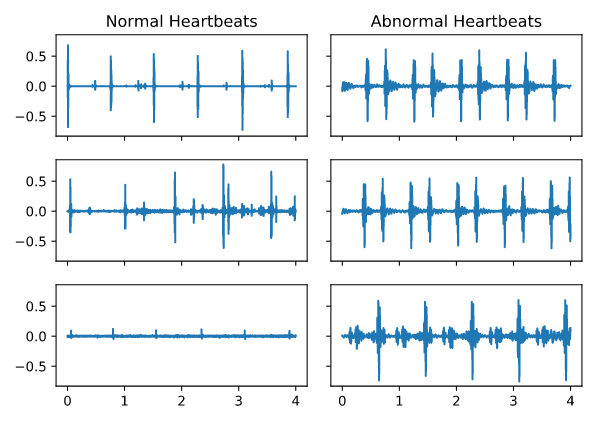

# Invariance in time

While you should always start by visualizing your raw data, this is often uninformative when it comes to discriminating between two classes of data points. Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye.

Another common technique to find simple differences between two sets of data is to average across multiple instances of the same class. This may remove noise and reveal underlying patterns (or, it may not).

In this exercise, you'll average across many instances of each class of heartbeat sound.

The two DataFrames (normal and abnormal) and the time array (time) from the previous exercise are available in your workspace.

Instructions

1. Average across the audio files contained in normal and abnormal, leaving the time dimension.

2. Visualize these averages over time.

In [ ]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

Conclusion

Correct! Do you see a noticeable difference between the two? Maybe, but it's quite noisy. Let's see how you can dig into the data a bit further.

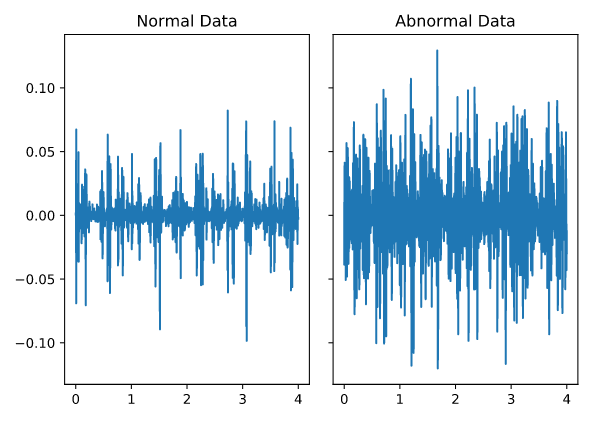

# Build a classification model

While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.

We've split the two DataFrames (normal and abnormal) into X_train, X_test, y_train, and y_test.

Instructions

1. Create an instance of the Linear SVC model and fit the model using the training data.

2. Use the testing data to generate predictions with the model.

3. Score the model using the provided code.

In [ ]:
from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

'''
<script.py> output:
    0.555555555556
'''

Conclusion:

Correct! Note that your predictions didn't do so well. That's because the features you're using as inputs to the model (raw data) aren't very good at differentiating classes. Next, you'll explore how to calculate some more complex features that may improve the results.

# Improving features for classification

Got It!
1. Improving the features we use for classification
What we've just performed is feature engineering of our audio data. Next, we'll cover a few more features that are more unique to timeseries data.

2. The auditory envelope
We'll begin by calculating the "envelope" of each heartbeat sound. The envelope throws away information about the fine-grained changes in the signal, focusing on the general shape of the audio waveform. To do this, we'll need to calculate the audio's amplitude, then smooth it over time.

3. Smoothing over time
First, we'll remove noise in timeseries data by smoothing it with a rolling window. This means defining a window around each timepoint, calculating the mean of this window, and then repeating this for each timepoint.

4. Smoothing your data
For example, on the left we have a noisy timeseries as well as an overlay of several small windows. Each timepoint will be replaced by the mean of the window just before it. The result is a smoother signal over time which you can see on the right.

5. Calculating a rolling window statistic
Let's cover how to do this with Pandas. We first use the dot-rolling method of our dataframe, which returns an object that can be used to calculate many different statistics within each window. The window parameter tells us how many timepoints to include in each window. The larger the window, the smoother the result will be.

6. Calculating the auditory envelope
Now that we know how to smooth our data, we can calculate the auditory envelope of our signal. First, we calculate the "absolute value" of each timepoint. This is also called "rectification", because you ensure that all time points are positive. Next, we calculate a rolling mean to smooth the signal. Let's see what these transformations look like.

7. The raw signal
First, we'll take a look at the raw audio signal.

8. Rectify the signal
Next, we take the absolute value of each timepoint.

9. Smooth the signal
Finally, we smooth the rectified signal. The result is a smooth representation of how the audio energy changes over time.

10. Feature engineering the envelope
Once we've calculated the acoustic envelope, we can create better features for our classifier. Here we'll calculate several common statistics of each auditory envelope, and combine them in a way that scikit-learn can use.

11. Preparing our features for scikit-learn
We'll then stack these features together with the same function we've used before. Even though we're calculating the same statistics (avg, standard deviation, and max), they are on different features, and so have different information about the stimulus.

12. Cross validation for classification
Now that our features are defined, lets fit a classifier and see how it performs. We'll use cross-validation in order to train and test the model on different subsets of data. We can use a single function to combine the steps of splitting data into training and validation sets, fitting the model on training data, and scoring predictions on validation data. Using "cross_val_score" will generate a list of scores across different "splits" of our data.

13. Using cross_val_score
To use it, pass an instance of a scikit-learn model as the first parameter, and the X and y data as second and third parameters. You can configure the strategy that scikit-learn uses to split the data with the CV parameter. Passing an integer will determine the number of splits that are made (and the number of scores generated).

14. Auditory features: The Tempogram
There are several more advanced features that can be calculated with timeseries data. Each attempts to detect particular patterns over time, and summarize them statistically. For example, a tempogram tells us the "tempo" of the sound at each moment. We'll show how to calculate it using a popular tool for audio analysis in Python called librosa.

15. Computing the tempogram
Here we show how librosa can be used to extract the tempogram from an audio array. This tells us the moment-by-moment tempo of the sound. We can then use this to calculate features for our classifier.

16. Let's practice!
Now it's your turn. We'll practice some simple feature engineering on auditory data using the techniques that we've discussed in this lesson. We'll then combine these features in a scikit-learn classifier.

# Calculating the envelope of sound

One of the ways you can improve the features available to your model is to remove some of the noise present in the data. In audio data, a common way to do this is to smooth the data and then rectify it so that the total amount of sound energy over time is more distinguishable. You'll do this in the current exercise.

A heartbeat file is available in the variable audio.

Instructions

1. Visualize the raw audio you'll use to calculate the envelope.

In [ ]:
# Plot the raw data first
audio.plot(figsize=(10, 5))
plt.show()

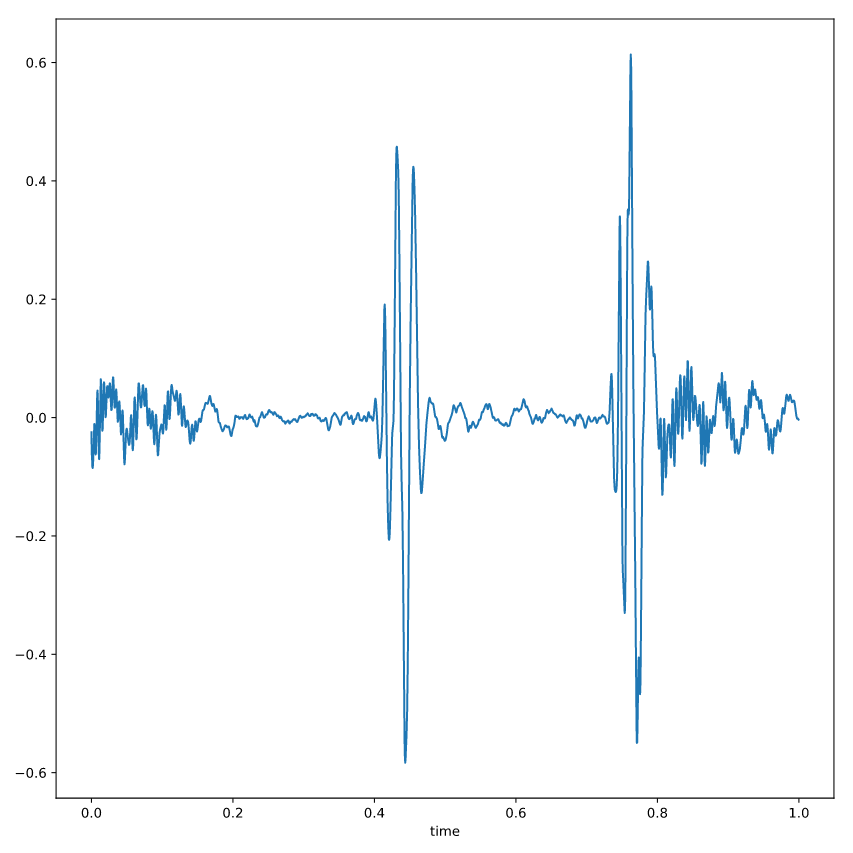

 2. Rectify the audio.

 3. Plot the result.

In [ ]:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()

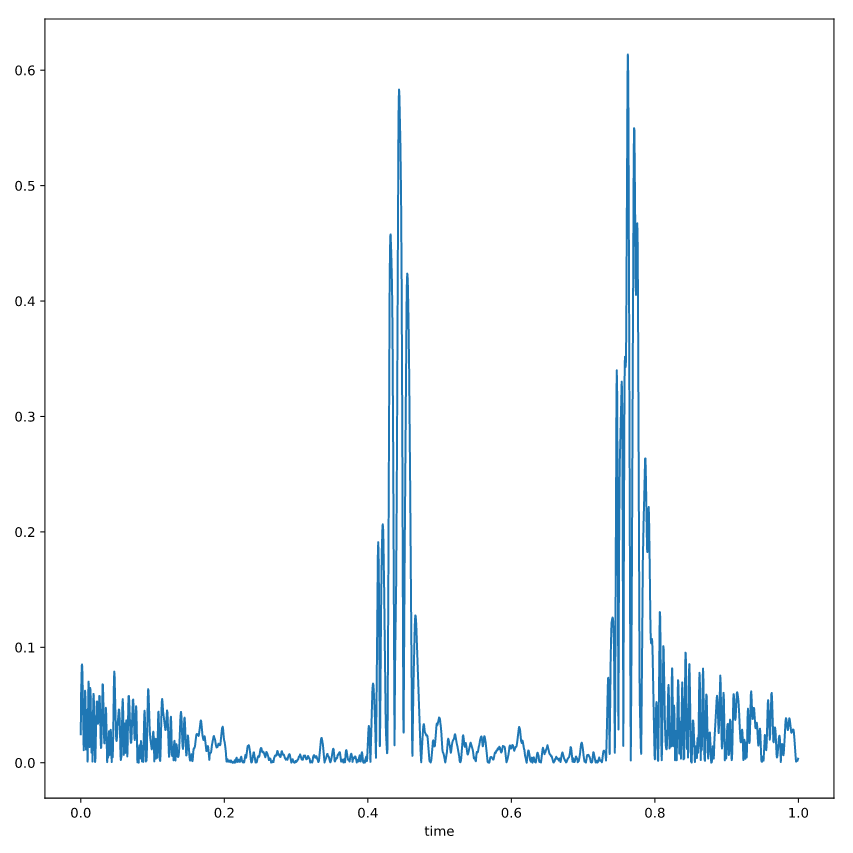

 4. Smooth the audio file by applying a rolling mean.

 5. Plot the result.

In [ ]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

Conclusion

Yes! By calculating the envelope of each sound and smoothing it, you've eliminated much of the noise and have a cleaner signal to tell you when a heartbeat is happening.

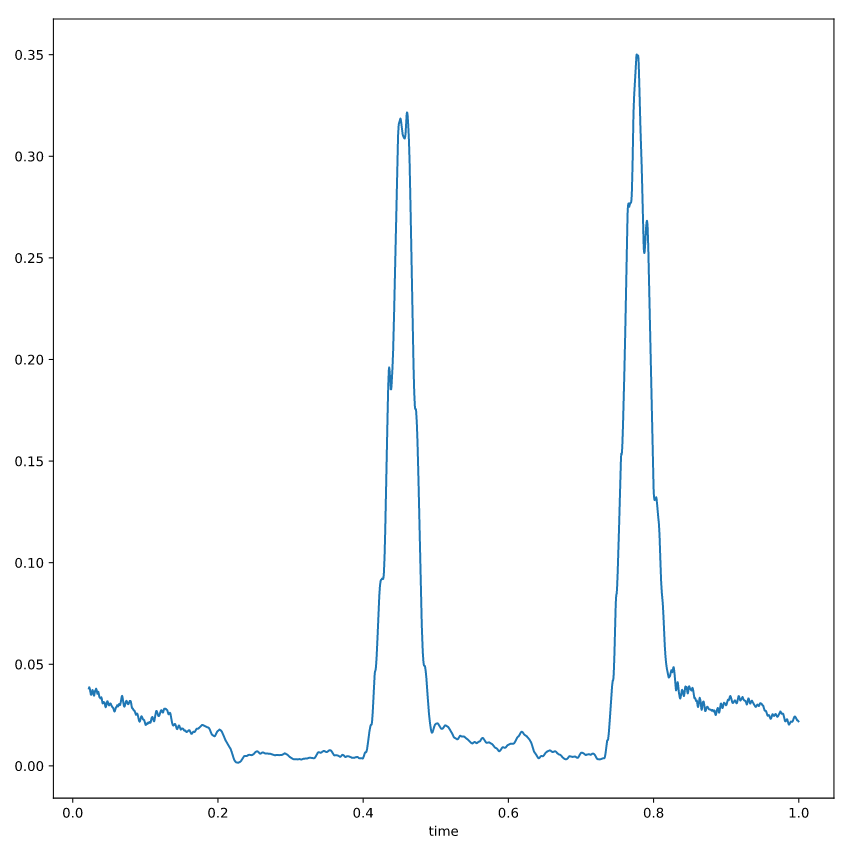

# Calculating features from the envelope

Now that you've removed some of the noisier fluctuations in the audio, let's see if this improves your ability to classify.

audio_rectified_smooth from the previous exercise is available in your workspace.

Instructions

1. Calculate the mean, standard deviation, and maximum value for each heartbeat sound.

2. Column stack these stats in the same order.

3. Use cross-validation to fit a model on each CV iteration.

In [ ]:
# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

'''
<script.py> output:
    0.716666666667
'''

Conclusion

Correct! This model is both simpler (only 3 features) and more understandable (features are simple summary statistics of the data).

# Derivative features: The tempogram

One benefit of cleaning up your data is that it lets you compute more sophisticated features. For example, the envelope calculation you performed is a common technique in computing tempo and rhythm features. In this exercise, you'll use librosa to compute some tempo and rhythm features for heartbeat data, and fit a model once more.

Note that librosa functions tend to only operate on numpy arrays instead of DataFrames, so we'll access our Pandas data as a Numpy array with the .values attribute.

Instructions

1. Use librosa to calculate a tempogram of each heartbeat audio.

2. Calculate the mean, standard deviation, and maximum of each tempogram (this time using DataFrame methods)

In [ ]:
# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

 3. Column stack these tempo features (mean, standard deviation, and maximum) in the same order.

 4. Score the classifier with cross-validation.

In [ ]:
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

'''
<script.py> output:
    0.533333333333
'''

Conclusion

Correct! Note that your predictive power may not have gone up (because this dataset is quite small), but you now have a more rich feature representation of audio that your model can use!

# The spectrogram

1. The spectrogram - spectral changes to sound over time
In this lesson, we'll discuss a special case of timeseries features: the spectrogram. Spectrograms are common in timeseries analysis, and we'll cover some basics to help you apply it to your machine learning problems.

2. Fourier transforms
To begin, we'll discuss a key part of the spectrogram: the Fourier Transform. This approach summarizes a time series as a collection of fast- and slow-moving waves. The Fourier Transform (or FFT) is a way to tell us how these waves can be combined in different amounts to create our time series.

3. A Fourier Transform (FFT)
On the left is a raw audio signal, and on the right is the Fourier Transform (or FFT) of the signal. This describes, for a window of time, the presence of fast- and slow-oscillations that are present in a timeseries. The slower oscillations are on the left (closer to 0) and the faster oscillations are on the right. This is a more rich representation of our audio signal.

4. Spectrograms: combinations of windows Fourier transforms
We can calculate multiple fourier transforms in a sliding window to see how it changes over time. For each timepoint, we take a window of time around it, calculate a fourier transform for the window, then slide to the next window (similar to calculating the rolling mean). The result is a description of the fourier transform as it changes throughout the timeseries. This is called a short-time fourier transform or STFT.

5. A Spectrogram Visualized
To calculate the spectrogram, we square each value of the STFT. An example is shown here. Note how the spectral content of the sound changes over time. Because this is speech, we see interesting patterns that correspond to spoken words (e.g. vowels or consonants).

6. Calculating the STFT
We'll use librosa's stft function to calculate a spectrogram. There are many parameters in this process, but we'll focus on the size of the window that is used. We'll calculate the STFT of our audio file, then convert the output to decibels to visualize it more cleanly with specshow (which results in the visualized spectrogram).

7. Calculating the STFT with code
Here's how to compute an STFT with librosa. We first define the size of the window used for the STFT. Next, we calculate the STFT, then convert it to decibels using the amplitude_to_db function, which ensures all values are positive, real numbers. Finally, we use the specshow function, which lets us quickly visualize a spectrogram. This code was used to produce the image shown in the previous slide. Note that we're glossing over some complex details for how spectrograms are calculated, but are focusing on the essentials for the purpose of fitting models.

8. Spectral feature engineering
Each timeseries has a unique spectral pattern to it. This means we can use patterns in the spectrogram to distinguish classes from one another. For example, we can calculate the spectral centroid and bandwidth over time. These describe where most of the spectral energy lies over time.

9. Calculating spectral features
To calculate the spectral centroid and bandwidth, we again turn to librosa. We'll use the spectral_bandwidth and spectral_centroid functions to calculate these values at each moment in time for the spectrogram we've computed. These functions could also accept a raw audio signal (in which case the STFT will be performed first). This visualization code is what produced the figure on the previous slide.

10. Combining spectral and temporal features in a classifier
In this chapter, we've calculated many different kinds of auditory features from our heartbeat sounds. As a final step, we can combine each of the features mentioned before into a single input matrix for our classifier. Here we calculate the mean value of the spectral centroid and bandwidth, and stack these into a single classifier input matrix. In general, as we include more complex features into our model, we'll improve model performance.

11. Let's practice!
Now let's try some examples.

# Spectrograms of heartbeat audio

Spectral engineering is one of the most common techniques in machine learning for time series data. The first step in this process is to calculate a spectrogram of sound. This describes what spectral content (e.g., low and high pitches) are present in the sound over time. In this exercise, you'll calculate a spectrogram of a heartbeat audio file.

We've loaded a single heartbeat sound in the variable audio.

Instructions

1. Import the short-time fourier transform (stft) function from librosa.core.

2. Calculate the spectral content (using the short-time fourier transform function) of audio.

In [ ]:
# Import the stft function
from librosa.core import stft

# Prepare the STFT
HOP_LENGTH = 2**4
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)

 3. Convert the spectogram (spec) to decibels.

 4. Visualize the spectogram.

In [ ]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
plt.show()

Conclusion

Nicely done! Do you notice that the heartbeats come in pairs, as seen by the vertical lines in the spectrogram?

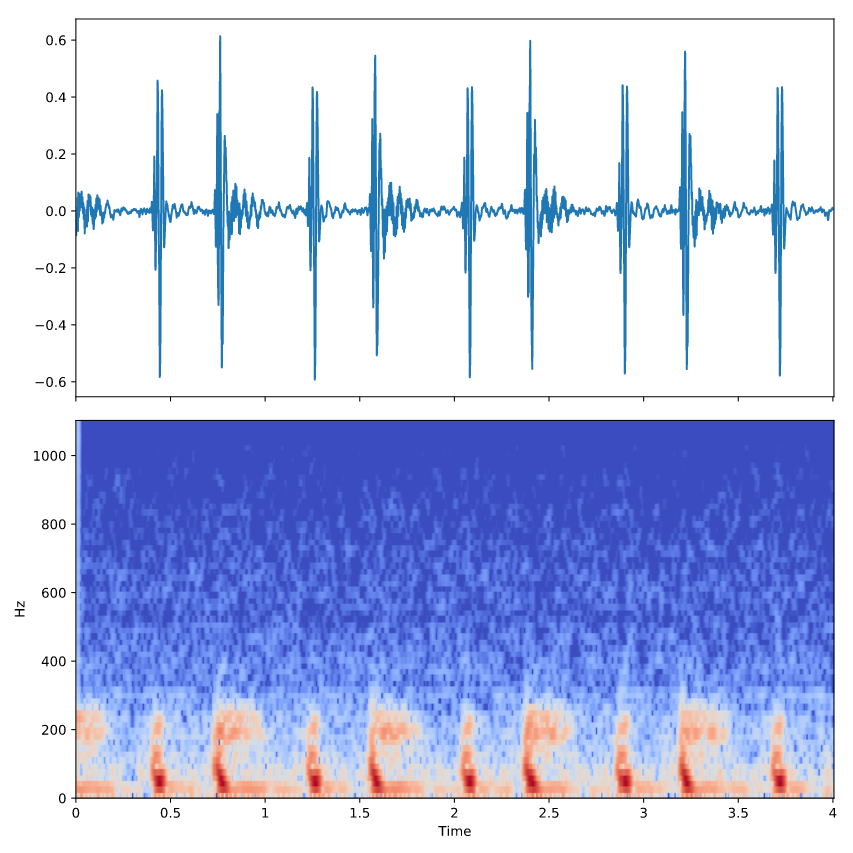

# Engineering spectral features

As you can probably tell, there is a lot more information in a spectrogram compared to a raw audio file. By computing the spectral features, you have a much better idea of what's going on. As such, there are all kinds of spectral features that you can compute using the spectrogram as a base. In this exercise, you'll look at a few of these features.

The spectogram spec from the previous exercise is available in your workspace.

Instructions

1. Calculate the spectral bandwidth as well as the spectral centroid of the spectrogram by using functions in librosa.feature.

In [ ]:
import librosa as lr

# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

 2. Convert the spectrogram to decibels for visualization.

 3. Plot the spectrogram over time.

In [ ]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
ax = specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show()

Conclusion

Good job! As you can see, the spectral centroid and bandwidth characterize the spectral content in each sound over time. They give us a summary of the spectral content that we can use in a classifier.

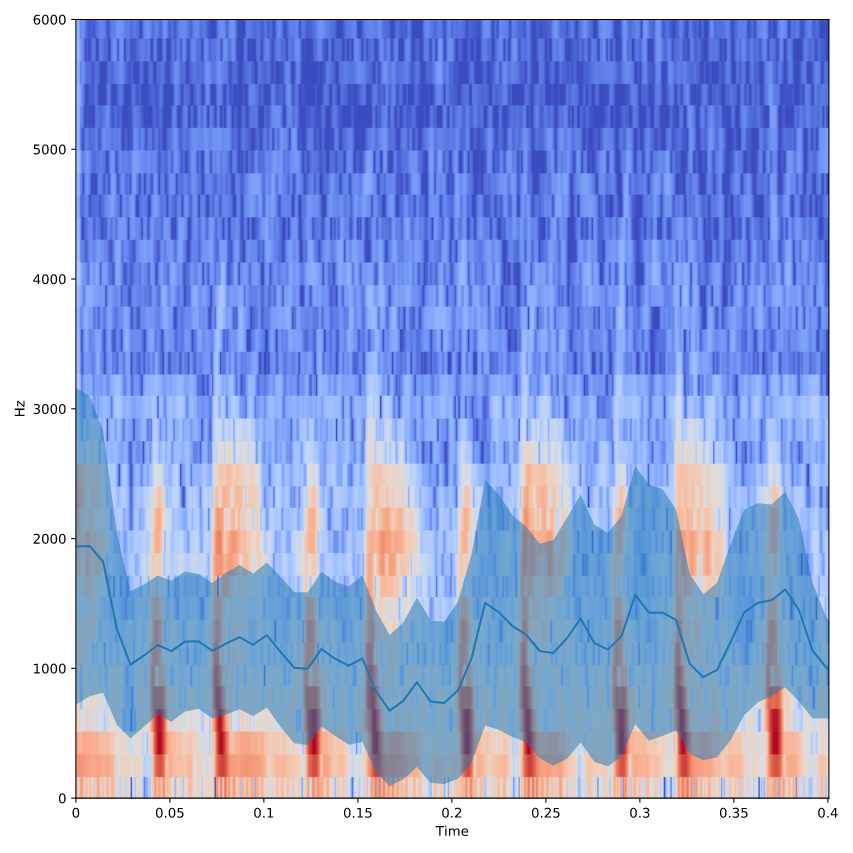

# Combining many features in a classifier

You've spent this lesson engineering many features from the audio data - some contain information about how the audio changes in time, others contain information about the spectral content that is present.

The beauty of machine learning is that it can handle all of these features at the same time. If there is different information present in each feature, it should improve the classifier's ability to distinguish the types of audio. Note that this often requires more advanced techniques such as regularization, which we'll cover in the next chapter.

For the final exercise in the chapter, we've loaded many of the features that you calculated before. Combine all of them into an array that can be fed into the classifier, and see how it does.

Instructions

1. Loop through each spectrogram, calculating the mean spectral bandwidth and centroid of each.

Hint

You need to use the mean(), spectral_bandwidth(), and spectral_centroid() functions.

In [ ]:
# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)

 2. Column stack all the features to create the array X.

 3. Score the classifier with cross-validation.

In [ ]:
# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

'''
<script.py> output:
    0.483333333333
'''

Conclusion

Good job! You calculated many different features of the audio, and combined each of them under the assumption that they provide independent information that can be used in classification. You may have noticed that the accuracy of your models varied a lot when using different set of features. This chapter was focused on creating new "features" from raw data and not obtaining the best accuracy. To improve the accuracy, you want to find the right features that provide relevant information and also build models on much larger data.